## Numbers Dataset

We have a dataset of handwritten digits from 0 to 9

We need some library to read the images, I've chosen the pillow library which comes with Anaconda, if you need to 

pip install Pillow

should install it for you

In [127]:
import numpy as np
import glob
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd

In [128]:
##Printing Examples
def printexamples(X, y, examples_per_class = 10, number_of_classes = 10, mult = 1.0):
    pos = 0
    data = pd.DataFrame(y, columns=["yvalue"])
    for cls in range(number_of_classes):
        this_class = data[data["yvalue"] == cls]
        idxs = this_class.sample(examples_per_class).index
        for i, idx in enumerate(idxs):
            plt.subplot(examples_per_class, number_of_classes, i * number_of_classes + cls + 1)
            plt.imshow((X[idx]*mult).reshape(20,20).astype('uint8'), cmap='gray')
            plt.axis('off')
            if i == 0:
                plt.title(str(cls))
    plt.show()

# 1 Preparing the Data

In [129]:
def sort_image_data(image_dir='data/*/*.png'):
    # Initialize a dictionary to store lists of images for each digit
    image_data = {str(i): [] for i in range(10)}
    
    # Get a list of all the PNG image files
    image_files = glob.glob(image_dir)
    
    # Process each image file
    for filename in image_files:
        # Open the image and convert it to a NumPy array (20x20)
        img = np.array(Image.open(filename))
        
        # Extract the label from the path (assuming it's in the folder name)
        label = filename.split('/')[-2]  # Assumes structure data/<label>/<image>.png
        
        # Append the image data to the correct label's list
        if label in image_data:
            image_data[label].append(img)
    
    # Return the sorted dictionary of image data
    return image_data

# Run the test
sorted_data = sort_image_data()

# Print the result for verification
for label, images in sorted_data.items():
    print(f"Label {label} has {len(images)} images.")

Label 0 has 500 images.
Label 1 has 500 images.
Label 2 has 500 images.
Label 3 has 500 images.
Label 4 has 500 images.
Label 5 has 500 images.
Label 6 has 500 images.
Label 7 has 500 images.
Label 8 has 500 images.
Label 9 has 500 images.


## Make the matrix X (all the attributes) and the vector y (the corresponding class)
1. Are X and y the right shapes? X should be a 2D array, y should be a 1D array. Reshape as needed.
2. If everything is set up correctly, the code commented as ##Printing Examples will out-put a random selection of 10 examples for each class.
3. What type of colours are the pixels in the image? What range of numbers do they take?
4. When dealing with image data, often it is better to have the numbers in the range 0-1 rather than 0-16 or 0-255 so you should alter the X array by dividing by the right number.
5. You will use the same training set, validation set and test set for all models. Use train test split method with random state set so that you get the same split everytime you run the work-book.

In [130]:
# Get the file list using glob
filelist = glob.glob('data/*/*.png')

# Get the sorted data (X, y) from the sort_image_data function
sorted_data = sort_image_data()

# Flatten the image arrays and create the feature matrix X and target vector y
X = np.array([img.flatten() for label_images in sorted_data.values() for img in label_images])
y = np.array([int(label) for label, images in sorted_data.items() for _ in images])

# Verify the result
print("Shape of X (features):", X.shape)  # Should be (num_images, 400) if each image is 20x20
print("Shape of y (labels):", y.shape)  # Should be (num_images,)
print("Sample y (labels):", y[::250]) # print every 500th label

Shape of X (features): (5000, 400)
Shape of y (labels): (5000,)
Sample y (labels): [0 0 1 1 2 2 3 3 4 4 5 5 6 6 7 7 8 8 9 9]


In [131]:
import sklearn
from sklearn.model_selection import train_test_split

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Printing the sizes of the splits
print("Training set size:", X_train.shape, 
        "Validation set size:", X_val.shape, 
        "Test set size:", X_test.shape)

Training set size: (3500, 400) Validation set size: (750, 400) Test set size: (750, 400)


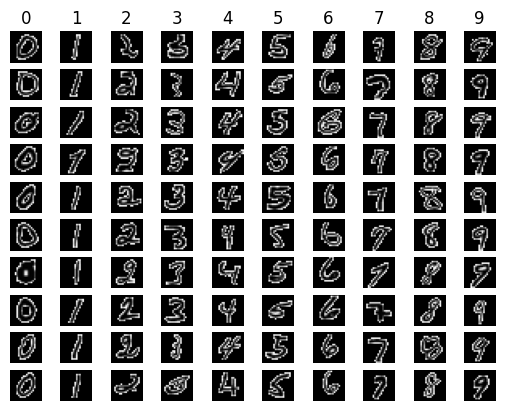

In [132]:
printexamples(X_train, y_train, examples_per_class=10, number_of_classes=10, mult=255.0)


# K-Nearest Neighbours
## Create a k-NN model with k = 5

In [133]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Create the k-NN model with k = 5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model on the training set
knn.fit(X_train, y_train)

# Score the model on the training and validation sets
train_accuracy = knn.score(X_train, y_train)
val_accuracy = knn.score(X_val, y_val)

print(f"Training accuracy: {train_accuracy:.4f}")
print(f"Validation accuracy: {val_accuracy:.4f}")

Training accuracy: 0.9609
Validation accuracy: 0.9333


## Evaluate Model

In [134]:
# Make predictions on the test set
y_pred = knn.predict(X_test)

# Count the incorrect predictions
incorrect_predictions = (y_pred != y_test).sum()
print(f"Number of incorrect predictions on the test set: {incorrect_predictions}")

# Print a classification report for the test set
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred))


Number of incorrect predictions on the test set: 43

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        77
           1       0.89      1.00      0.94        80
           2       0.97      0.90      0.93        77
           3       0.95      0.94      0.95        84
           4       0.96      0.92      0.94        72
           5       0.89      0.97      0.93        70
           6       0.97      0.97      0.97        68
           7       0.98      0.93      0.95        85
           8       0.95      0.83      0.88        64
           9       0.92      0.96      0.94        73

    accuracy                           0.94       750
   macro avg       0.94      0.94      0.94       750
weighted avg       0.94      0.94      0.94       750



Percision: 1 & 5
Recall: 8 & 2
f1-score: 8
suppourt: 6

## Print the Confusion Matrix and Comment on False Positives and False Negatives

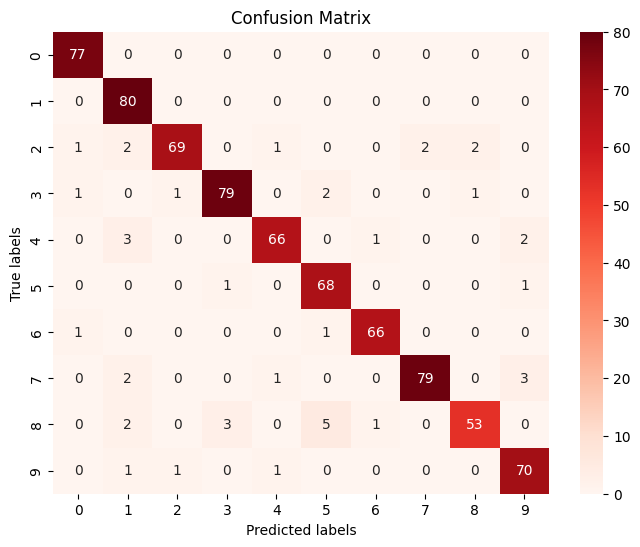


False Negatives per Class:
[ 0  0  8  5  6  2  2  6 11  3]

False Positives per Class:
[ 3 10  2  4  3  8  2  2  3  6]
Class with most false negatives: 8
Class with most false positives: 1


In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Analyze False Negatives and False Positives
# False negatives: where the true class is high but predicted as low
false_negatives = np.sum(conf_matrix, axis=1) - np.diag(conf_matrix)
# False positives: where predicted as class k, but true class is not k
false_positives = np.sum(conf_matrix, axis=0) - np.diag(conf_matrix)

# Print which classes have the most false negatives and false positives
print("\nFalse Negatives per Class:")
print(false_negatives)

print("\nFalse Positives per Class:")
print(false_positives)

# Class with most false negatives (should have the most missclassified instances):
most_false_negatives = np.argmax(false_negatives)
print(f"Class with most false negatives: {most_false_negatives}")

# Class with most false positives:
most_false_positives = np.argmax(false_positives)
print(f"Class with most false positives: {most_false_positives}")

# Implement a kFold Cross Validation to find the best k.(use 5 folds)

In [137]:
for i in range(1, 21):
    knn = KNeighborsClassifier(i+1)
    knn.fit(X_train, y_train)
    train_accuracy = knn.score(X_train, y_train)
    val_accuracy = knn.score(X_val, y_val)
    # Find best model
    if i == 1:
        bestmodel = knn
        bestaccuracy = val_accuracy
        bestk = i+1
    elif val_accuracy > bestaccuracy:
        bestmodel = knn
        bestaccuracy = val_accuracy
        bestk = i+1
        print(f"Training accuracy: {train_accuracy:.4f}")
        print(f"Validation accuracy: {val_accuracy:.4f}")
        print(f"K = {i+1}")
        print("\n")
print(f"Best Model: {bestmodel}")
print(f"Best Accuracy: {bestaccuracy}")
print(f"Best K: {bestk}")

Training accuracy: 0.9737
Validation accuracy: 0.9280
K = 3


Training accuracy: 0.9631
Validation accuracy: 0.9333
K = 4


Training accuracy: 0.9537
Validation accuracy: 0.9347
K = 6


Training accuracy: 0.9540
Validation accuracy: 0.9360
K = 7


Training accuracy: 0.9497
Validation accuracy: 0.9373
K = 8


Best Model: KNeighborsClassifier(n_neighbors=8)
Best Accuracy: 0.9373333333333334
Best K: 8
